# __D209 PA Task 1:__ *Classification Analysis using K-Nearest Neighbors*
>### Aaminah Halipoto
>### Western Governor's University
>### D209: Data Mining I
>### Prof. Festus Elleh
>### Oct 1. 2024

### Table of Contents
>A1. [Proposal of Question](#question) </br>
A2. [Defined Goal](#goal)</br>
B1. [Explanation of Classification Method](#classmethod)</br>
B2. [Summary of Method Assumption](#summary)</br>
B3. [Packages and Libraries](#packages)</br>
C1. [Data preprocessing](#preprocessing)</br>
C2. [Dataset variables](#dataset)</br>
C3. [Steps for analysis](#steps)</br>
C4. [Cleaned dataset](#cleaned)</br>
D1. [Splitting data](#splitting)</br>
D2. [Output and intermediate calculations](#output)</br>
D3. [Code execution](#code)</br> 
E1. [Accuracy and AUC](#accuracy)</br>
E2. [Results and implications](#results)</br>
E3. [Limitations](#limitations)</br>
E4. [Course of action](#course)</br>
F. [Panopto Demonstration](#panoptolink)</br>
G. [Sources of Third-Party Code](#codesources)</br>
H. [Web Sources](#sources)</br>

#### __A1. Proposal of Question__ <a name="toolsbenefits"></a>
<i>Can I determine the possibility of customer churn, via K-Nearest Neighbors (KNN) classification, to provide actional insights in retaining customers within the provider's base? 

#### __A2. Defined Goal__ <a name="goal"></a>
My goal is to build a binary KNN classifier that can accurately predict churn ('Churn'). I would like to isolate areas of interest for the service provider to focus on when trying to prevent customer churn.

#### __B1. Explanation of Classification Method__ <a name="classmethod"></a>
__K-Nearest Neighbors (KNN)__ is a supervised learning classifier that assigns predictions for a response variable's target points into classes (Shafi, 2023). For any value K, a prediction is classified as the label that occurs most frequently amongst the K nearest labels. As I am analyzing an ordinal categorical variable with 2 values construed in binary, this endeavor is identified as <u>binary classification<u/>.

Adjusting the number of K changes the amount of data and labels used to form a prediction,  potentially shifting the classifier's decision boundary -- the points at which the classifier indicates 'Churn's  predictions are in flux between classes (GeeksforGeeks, 2024). In the case of the ordinal categorical variable 'Churn', these classes are '0' (no churn) and '1' (active churn).

The model learns based off of a 70% proportion of 'training' data, with results validated against the smaller 30% section of 'test' data. From there, I will be able to measure the accuracy of the classifier model. __Given that the predictor variables have been gathered from logistic regression analysis that suggested strong relationships between these variables__, I expect the classifier model to predict accurate values for 'Churn'.

#### __B2. Summary of Method Assumption__ <a name="summary"></a>
I am performing KNN with several assumptions: one being that the datapoints are separated by discrete measures of distance (Vishalmendekarhere, 2021). This means that the data can be plotted on a graph numerically, which is necessary to measure distance between points and determine the set of K neighbors for any given datapoint. Without this assumption, there would be no standard with which to measure the proximity of datapoints, rendering KNN analysis impossible.

#### __B3. Packages and Libraries__ <a name="packages"></a>
I am using Python v. 3.12 in the JupyterLabs IDE, with several useful analytical libraries. Firstly, Pandas is used for its myriad capabilities in manipulating dataframes. Seaborn and matplotlib both render detailed visualizations such as the histogram and boxplot, essential to my process in identifying outliers. Scikit-learn contains the breadth of functions for data-mining: KNN analysis, train_test_split to split mining data scaling for normalization, as well as evaluation tools such as classification_report, the confusion matrices, and ROC/AUC curves. The Statsmodels package contains the useful APIs for creating regression models and providing summary info on model structures, seen in the mosaic function.

#### __C1. Data preprocessing__ <a name="preprocessing"></a>
One of my goals is to ensure that the dataset is free of null values, as this would disrupt the mining process. Training data necessitates test data in the first place; if there were pockets of missing information in the test data, this dearth of information is what will be predicted, defeating the point of our endeavor to predict new values. In any case, missing data commonly results in errors within any data mining process, so it's important to check that all data is present and treat issues as they arise.

In [9]:
#import necessary functions
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.api import qqplot
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.formula.api import logit
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.neighbors import KNeighborsClassifier as kneighbor
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc

#setting "clean" data as a dataframe
df = pd.read_csv('C://Users/Aaminah/Desktop/masters/D208/churn_clean.csv')

#allowing our dictionaries to cast between datatypes
pd.set_option('future.no_silent_downcasting', True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

#### __C2. Dataset variables__ <a name="dataset"></a>
The variables to be used in my KNN analysis are: 
> Churn, the ordinal categorical response variable, </br>

> Tenure, a numerical variable,</br>

> Contract, a nominal categorical variable,</br>

> Techie, a categorical variable, and</br>

> PaymentMethod, a nominal categorical variable.

#### __C3. Steps for analysis__ <a name="steps"></a>
In order to fulfill the assumptions of the classifier, the data must be clean of all nulls, duplicates, and outstanding outliers. Categorical variables must be wrangled into numeric forms via one-hot encoding. The resulting data will then be normalized using the sklearn Scaler in order to be used for training.

This process is detailed below, giving way to the finished dataset to be used in mining.

In [12]:
testdf = df[['Churn', 'Techie', 'Tenure', 'Contract', 'PaymentMethod']]
testdf.head()

,Churn,Techie,Tenure,Contract,PaymentMethod
0,No,No,6.795513,One year,Credit Card (automatic)
1,Yes,Yes,1.156681,Month-to-month,Bank Transfer(automatic)
2,No,Yes,15.754144,Two Year,Credit Card (automatic)
3,No,Yes,17.087227,Two Year,Mailed Check
4,Yes,No,1.670972,Month-to-month,Mailed Check


In [13]:
#checking for duplicates, of which there are none.
testdf.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [14]:
#checking for nulls, of which there are none
testdf.isnull().sum()

Churn            0
Techie           0
Tenure           0
Contract         0
PaymentMethod    0
dtype: int64

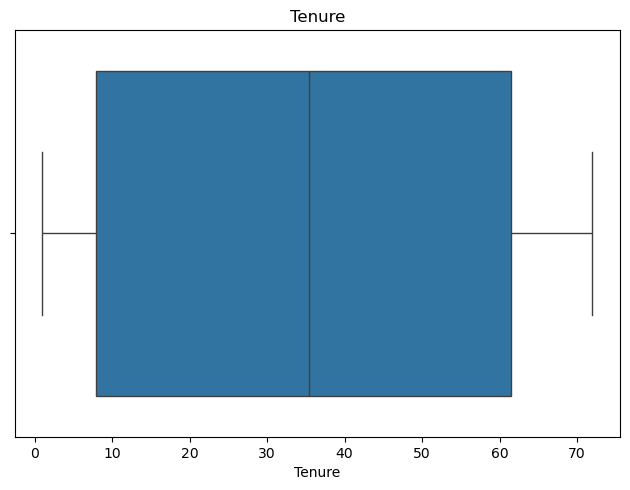

In [15]:
#checking for outliers 
for col in testdf: 
    if pd.api.types.is_numeric_dtype(testdf[col]):
        boxplot = sb.boxplot(x=testdf[col], data=testdf)
        plt.tight_layout()
        plt.title(col)
        plt.show()
    else: continue

In [16]:
#beginning one-hot encoding of all categorical variables. 
df['Churn_numeric'] = df['Churn']
dict_churn = {"Churn_numeric": {"No": 0, "Yes": 1}}
df = df.replace(dict_churn)
df["Churn_numeric"]= df["Churn_numeric"].astype(int)

In [17]:
contract_encoded = pd.get_dummies(df['Contract'], dtype = int)
contract_encoded.head()

,Month-to-month,One year,Two Year
0,0,1,0
1,1,0,0
2,0,0,1
3,0,0,1
4,1,0,0


In [18]:
#transferring dummy variables into dataframe
df['Contract_monthly'] = contract_encoded['Month-to-month']
df['Contract_one'] = contract_encoded['One year']
df['Contract_two'] = contract_encoded['Two Year']
print(df['Contract_two'])
df['Contract_one'].value_counts()

0       0
1       0
2       1
3       1
4       0
       ..
9995    0
9996    1
9997    0
9998    1
9999    0
Name: Contract_two, Length: 10000, dtype: int32


Contract_one
0    7898
1    2102
Name: count, dtype: int64

In [19]:
df['Techie_numeric'] = df['Techie']
dict_techie = {"Techie_numeric": {"No": 0, "Yes": 1}}
df = df.replace(dict_techie)
df["Techie_numeric"]= df["Techie_numeric"].astype(int)

In [20]:
payment_encoded = pd.get_dummies(df['PaymentMethod'], dtype = int)
payment_encoded.head()

,Bank Transfer(automatic),Credit Card (automatic),Electronic Check,Mailed Check
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1


In [21]:
df['Payment_transfer'] = payment_encoded['Bank Transfer(automatic)']
df['Payment_cc'] = payment_encoded['Credit Card (automatic)']
df['Payment_echeck'] = payment_encoded['Electronic Check']
df['Payment_mcheck'] = payment_encoded['Mailed Check']
df['Payment_mcheck'].head()

0    0
1    0
2    0
3    1
4    1
Name: Payment_mcheck, dtype: int32

#### __C4. Cleaned dataset__ <a name="cleaned"></a>
Below are the cleaned variables to be used in KNN analysis, compiled in the testdata dataframe.

Because KNN classifiers measure distance between points, it is necessary to normalize the dataset to prevent inaccurate distortion of the model. The result of this process is stored in the testpred_std dataframe.

In [23]:
testdata = df[['Churn_numeric', 'Tenure', 'Contract_monthly', 'Contract_one', 
               'Contract_two', 'Techie_numeric', 'Payment_transfer', 
               'Payment_cc', 'Payment_echeck', 'Payment_mcheck']]
testdata.head()

,Churn_numeric,Tenure,Contract_monthly,Contract_one,Contract_two,Techie_numeric,Payment_transfer,Payment_cc,Payment_echeck,Payment_mcheck
0,0,6.795513,0,1,0,0,0,1,0,0
1,1,1.156681,1,0,0,1,1,0,0,0
2,0,15.754144,0,0,1,1,0,1,0,0
3,0,17.087227,0,0,1,1,0,0,0,1
4,1,1.670972,1,0,0,0,0,0,0,1


In [24]:
#using the Scaler to normalize all predictor variables and store the result 
#in testpred_std
scaler = StandardScaler()
testpred = testdata.drop(['Churn_numeric'], axis=1)
testpred_std = pd.DataFrame(scaler.fit_transform(testpred), columns = testpred.columns)
testresp = testdata[['Churn_numeric']]
frames = [testresp, testpred_std]

testpred_std = pd.concat(frames, axis=1)
testpred_std.head()

,Churn_numeric,Tenure,Contract_monthly,Contract_one,Contract_two,Techie_numeric,Payment_transfer,Payment_cc,Payment_echeck,Payment_mcheck
0,0,-1.048746,-1.095767,1.938395,-0.568420,-0.449198,-0.535570,1.949556,-0.717421,-0.544993
1,1,-1.262001,0.912603,-0.515891,-0.568420,2.226191,1.867168,-0.512937,-0.717421,-0.544993
2,0,-0.709940,-1.095767,-0.515891,1.759262,2.226191,-0.535570,1.949556,-0.717421,-0.544993
3,0,-0.659524,-1.095767,-0.515891,1.759262,2.226191,-0.535570,-0.512937,-0.717421,1.834888
4,1,-1.242551,0.912603,-0.515891,-0.568420,-0.449198,-0.535570,-0.512937,-0.717421,1.834888


In [25]:
testpred_std.to_csv('C://Users/Aaminah/Desktop/masters/D209/testpred_std_pt1.csv', index=False)

#### __D1. Splitting data__ <a name="splitting"></a>
Below details the process of splitting the data 70/30 into training/testing data, respectively. The model's y is initialized as the response variable 'Churn_numeric', and the X as the remaining predictor variables.

In [27]:
y = testpred_std[['Churn_numeric']].values.ravel()
X = testpred_std.drop(['Churn_numeric'], axis=1).values
#print(y.shape, X.shape)
testpred_std.drop(['Churn_numeric'], axis=1).head()

,Tenure,Contract_monthly,Contract_one,Contract_two,Techie_numeric,Payment_transfer,Payment_cc,Payment_echeck,Payment_mcheck
0,-1.048746,-1.095767,1.938395,-0.568420,-0.449198,-0.535570,1.949556,-0.717421,-0.544993
1,-1.262001,0.912603,-0.515891,-0.568420,2.226191,1.867168,-0.512937,-0.717421,-0.544993
2,-0.709940,-1.095767,-0.515891,1.759262,2.226191,-0.535570,1.949556,-0.717421,-0.544993
3,-0.659524,-1.095767,-0.515891,1.759262,2.226191,-0.535570,-0.512937,-0.717421,1.834888
4,-1.242551,0.912603,-0.515891,-0.568420,-0.449198,-0.535570,-0.512937,-0.717421,1.834888


In [28]:
#initializing train and test variables with a 70/30 stratified split
#(Boorman, 2024)
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=21, stratify=y)

#creating knn model and fitting to training datasets
knn = kneighbor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
#obtaining predictions for test data via the built classifier
y_pred= knn.predict(X_test)

In [30]:
#exporting all sets as .csv
df_X_train = pd.DataFrame(X_train) 
df_X_train.to_csv('C://Users/Aaminah/Desktop/masters/D209/X_train_pt1.csv', index=False)

In [31]:
df_X_test = pd.DataFrame(X_test) 
df_X_test.to_csv('C://Users/Aaminah/Desktop/masters/D209/X_test_pt1.csv', index=False)

In [32]:
df_y_train = pd.DataFrame(y_train) 
df_y_train.to_csv('C://Users/Aaminah/Desktop/masters/D209/y_train_pt1.csv', index=False)

In [33]:
df_y_test = pd.DataFrame(y_test) 
df_y_test.to_csv('C://Users/Aaminah/Desktop/masters/D209/y_test_pt1.csv', index=False)

#### __D2. Output and intermediate calculations__ <a name="output"></a>
I did not perform any intermediate calculations.

#### __D3. Code execution__ <a name="code"></a>
All processes and code are included in the document 'knn-ahalipoto.ipynb'.

#### __E1. Accuracy and AUC__ <a name="accuracy"></a>

In [37]:
#finding accuracy for the training model at 85.5%
print(knn.score(X_train, y_train))

0.877


In [38]:
#scoring - ie, finding the accuracy of - the test KNN model at 77.9%
print(knn.score(X_test, y_test))

0.764


In [39]:
#f-1 = .78 for accuracy, matching the above
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
print(classification_report(y_test,y_pred))

[[1867  338]
 [ 370  425]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      2205
           1       0.56      0.53      0.55       795

    accuracy                           0.76      3000
   macro avg       0.70      0.69      0.69      3000
weighted avg       0.76      0.76      0.76      3000



In [40]:
#assigning roc arguments as y_test and predictions var
fpr,tpr,_ = roc_curve(y_test, y_pred)

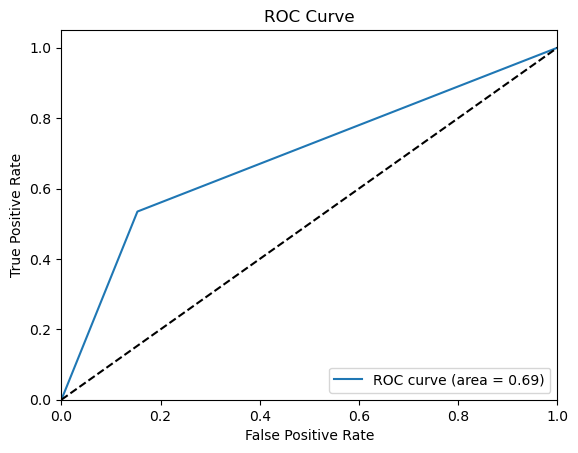

In [41]:
#conducting AUC on the test results vs predictions 
# (sambid9988, 2024)
roc_auc = auc(fpr,tpr)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

The accuracy measures at 76.4% (down from the training models 87.7%), representing the percentage of all predictions that were correct. This is a positive indication that my predictions are more meaningful than chance, but with much room (23.6%) for error. Not only that, accuracy gives no further insights to the proportion of errors in true positives as opposed to false positives, which I will be able to find in the ROC curve analysis.

ROC curves represent the ratio of true positives to false positives for a classifier. In the case of a binary model such as the one in this demonstration, the curve has an under-area of .5: representing the 50/50 chance of the model assigning any point a 0 or 1 label. The larger the area underneath the curve (AUC) of a ROC curve, the better fit the model is (Google, 2024).

My model has an AUC of .69; because this is greater than the 50/50 chance at .5, we can understand the model as being a better predictor than chance. 


#### __E2. Results and implications__ <a name="results"></a>
With an accuracy measure of about 77% and an AUC measure of about .69, it's clear that my model has much room for improvement. 

The ROC's elbow shape is notable, in that it suggests the ratio of true positives/false positives is favorable. The slope of the curve is quite steep with respect to true positives until false positives reach about .15, where the slope of the curve becomes less steep. This is promising; in essence, more than 50% of true positives can be accounted for while maintaining a relatively smaller fraction of false positives. If I wanted to maximize the amount of true positive predictions while mitigating false positives (Brownlee, 2021), I would consider a threshold at this bend in the elbow,  where the false positive rate is ~.15.

#### __E3. Limitations__ <a name="limitations"></a>
Due to sensitivities in modelling, it's entirely possible that errors in preliminary data cleaning (such as retaining outliers) have skewed my classifier's predictions. Additionally, the choice of variables may not be optimal within the dataset, where other variables may have been more relevant to my response variable. I used variables that were isolated using regression analysis, but it's entirely feasible for those variables to not be the most accurate predictors of my response variable.

It is also possible that my insights are skewed due to prioritizing predictions that are not as relevant as others, such as prioritizing true positives when false positives are more dangerous for the client.

In general, KNN should be tested to maximize accuracy and AUC. This was not the case here; if I ran different classifiers at k=5, 7, and onwards, I would find models more ideal than the one in this demonstration. 

#### __E4. Course of action__ <a name="course"></a>
Because my accuracy measures are not ideal, this model's better suited as a general indication of interest than a hard-line predictor for decisions of import. The status of a customer's tenure with the company, their method of payment, contract type, as well as technological familiarity all play a part in being able to detect possible churn for that customer. I would suggest broad-strokes; isolate customers that are predicted at-risk for churn (where predictions based on labels return '1') and treat the issue along the basis of the aforementioned customer traits. This could take many different forms: incentivizing cash payments, providing deals on longer contracts, or create rewards tiers for inviting new customers. Thanks to the predictions made by the KNN classifier, we are likely to see a difference in churn by mitigating the factors that cause churn.

#### __F. Panopto Demonstration__ <a name="panoptolink"></a>
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=4d675d08-ff9e-4840-8080-b20400bacc06

#### __G. Sources of Third-Party Code__ <a name="codesources"></a>
Boorman, George. Machine learning with scikit-learn: Python. campus.datacamp.com. (n.d.). https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/classification-1?ex=1 

Elleh, F. (n.d.). Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=77e354f7-ed96-4886-9a44-b07a00d44a31 

sambid9988. (n.d.). Machine-learning-with-python/KNN with AUC and ROC, with K (elbow method).ipynb at master · SAMBID9988/machine-learning-with-python. GitHub. https://github.com/sambid9988/Machine-Learning-with-Python/blob/master/KNN%20with%20auc%20and%20roc,%20with%20k%20(elbow%20method).ipynb 

#### __H. Web Sources__ <a name="sources"></a>
Brownlee, J. (2021, January 4). A gentle introduction to threshold-moving for Imbalanced Classification. MachineLearningMastery.com. https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/ 

GeeksforGeeks. (2024, September 10). Understanding decision boundaries in K-Nearest Neighbors (KNN). https://www.geeksforgeeks.org/understanding-decision-boundaries-in-k-nearest-neighbors-knn/?ref=oin_asr6 

Google. (n.d.). Classification: Roc and AUC  |  machine learning  |  google for developers. Google. https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc 

Shafi, A. (2023, February 20). K-Nearest Neighbors (KNN) classification with scikit-learn. DataCamp. https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn 

Vishalmendekarhere. (2021, January 22). It’s all about assumptions, Pros & Cons. Medium. https://medium.com/swlh/its-all-about-assumptions-pros-cons-497783cfed2d 